In [1]:
import sys
sys.executable

'C:\\Users\\SEAN\\anaconda3\\envs\\Carbon_Cloud\\python.exe'

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Creating a dataframe
transport_df = pd.read_csv("Model_CV_Grouped_Data.csv")
transport_df.tail(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
7379,VOLVO,XC40,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7380,VOLVO,XC60,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7381,VOLVO,XC60,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7382,VOLVO,XC90,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7383,VOLVO,XC90,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [4]:
#Information about the Dataframe
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   make                       7384 non-null   object 
 1   model                      7384 non-null   object 
 2   vehicle_class              7384 non-null   object 
 3   engine_size                7384 non-null   float64
 4   cylinders                  7384 non-null   int64  
 5   transmission               7384 non-null   object 
 6   fuel_type                  7384 non-null   object 
 7   fuel_consumption_city      7384 non-null   float64
 8   fuel_consumption_hwy       7384 non-null   float64
 9   fuel_consumption_comb      7384 non-null   float64
 10  fuel_consumption_comb_mpg  7384 non-null   int64  
 11  co2_emissions              7384 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.4+ KB


In [5]:
# Qualitative / Categorical Variables :- make, model, vehicle_class, transmission, fuel_type
transport_df_qualitative = transport_df.drop(['engine_size','cylinders','fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb', 'fuel_consumption_comb_mpg', 'co2_emissions'], axis=1)

# Quantitative Variables              :- engine_size, cylinders, fuel_consumption_city_(L/100 km), fuel_consumption_hwy_(L/100 km), fuel_consumption_comb_(L/100 km), fuel_consumption_comb_(mpg), co2_emissions(g/km)
transport_df_quantitative = transport_df.drop(['make','model', 'vehicle_class', 'transmission', 'fuel_type'], axis=1)

In [6]:
# Qualitative variable visualization and Analysis

In [7]:
# # Visualizing Using COUNT PLOT
# for i in transport_df_qualitative.columns:
#     plt.figure(figsize=(10,7))
#     sns_plt = sns.countplot(data=transport_df_qualitative, x=i)
#     sns_plt.set(title=i + " Count Plot")
#     sns_plt.tick_params(axis='x', rotation=90)
#     plt.tight_layout()

In [8]:
# Visualizing unique_categories_count & Observations/sample_count for each categories related to all Qualitative Variables
for i in transport_df_qualitative.columns:
    category_count = transport_df[i].value_counts()
    print(category_count)
    print("Unique categories count for", i ,":",transport_df[i].nunique())
    print()

make
FORD             628
CHEVROLET        587
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64
Unique categories count for make : 42

model
I series       230
COOPER         204
F-15

In [9]:
# Removing the fuel_type == N observation because only 1 data is associated with that fuel_type
transport_df = transport_df[transport_df['fuel_type'] != 'N']
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   make                       7384 non-null   object 
 1   model                      7384 non-null   object 
 2   vehicle_class              7384 non-null   object 
 3   engine_size                7384 non-null   float64
 4   cylinders                  7384 non-null   int64  
 5   transmission               7384 non-null   object 
 6   fuel_type                  7384 non-null   object 
 7   fuel_consumption_city      7384 non-null   float64
 8   fuel_consumption_hwy       7384 non-null   float64
 9   fuel_consumption_comb      7384 non-null   float64
 10  fuel_consumption_comb_mpg  7384 non-null   int64  
 11  co2_emissions              7384 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.4+ KB


In [10]:
transport_df.reset_index(drop=True, inplace=True)
transport_df.tail(5)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
7379,VOLVO,XC40,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7380,VOLVO,XC60,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7381,VOLVO,XC60,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7382,VOLVO,XC90,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7383,VOLVO,XC90,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [11]:
# Assuming df is your DataFrame and 'categorical_variable' is the column containing categorical variable
category_counts = transport_df['make'].value_counts().sort_values(ascending=False)
total_count = category_counts.sum()
cumulative_freq = (category_counts.cumsum() / total_count) * 100  # Calculate cumulative frequency in percentage

# # Create a DataFrame to store the results
# result_df = pd.DataFrame({
#     'Category': category_counts.index,
#     'Frequency': category_counts.values,
#     'Cumulative Frequency (%)': cumulative_freq.values
# })

# # Display the DataFrame
# result_df.to_csv('model_analysis.csv', index=False)

# Identify categories where cumulative frequency exceeds 95%
categories_to_replace = cumulative_freq[cumulative_freq > 95].index
# print(categories_to_replace)

# Replace those categories with 'others'
transport_df['make'] = transport_df['make'].apply(lambda x: 'others' if x in categories_to_replace else x)

In [12]:
transport_df['make'].value_counts()

make
FORD             628
CHEVROLET        587
BMW              527
MERCEDES-BENZ    419
others           406
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
Name: count, dtype: int64

In [13]:
transport_df['make'].nunique()

31

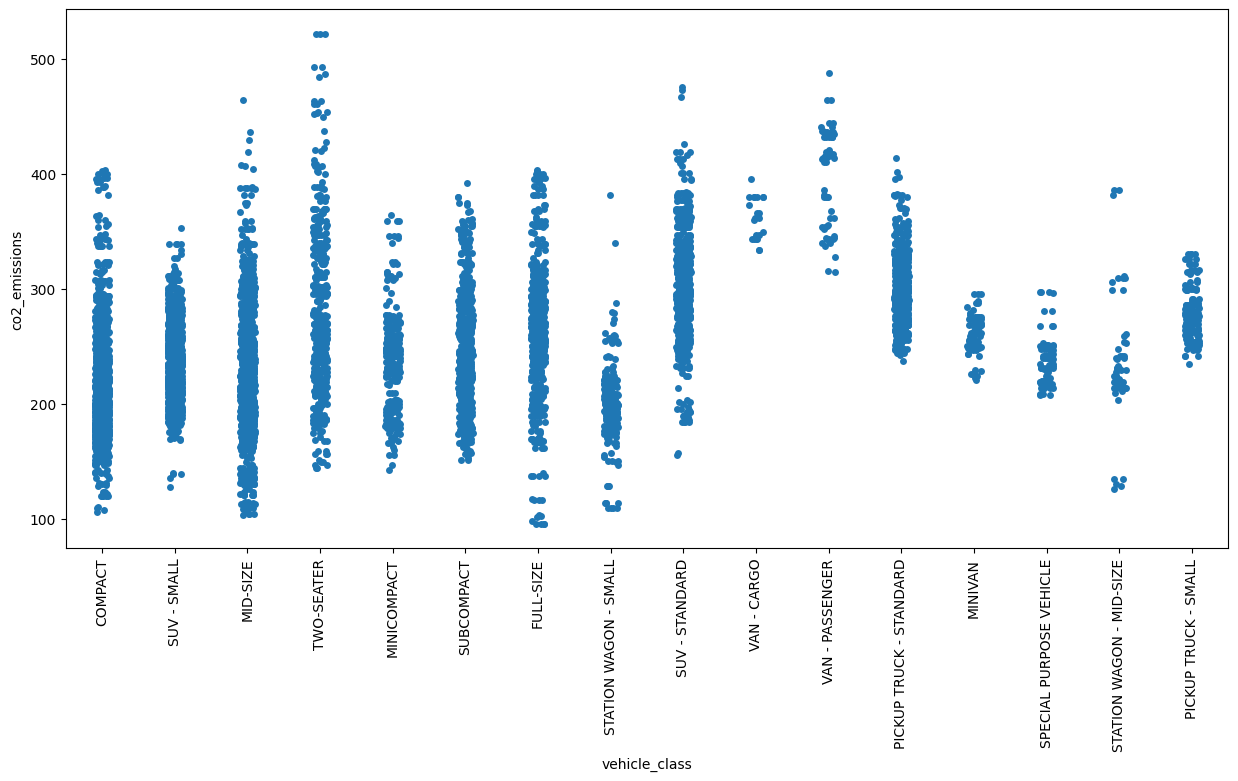

In [14]:
# Strip Plot of vehicle_class before Grouping
plt.figure(figsize=(15, 7))
sns_plt = sns.stripplot(data=transport_df, x=transport_df['vehicle_class'], y=transport_df['co2_emissions'], jitter=True)
sns_plt.tick_params(axis='x', rotation=90)
plt.show()

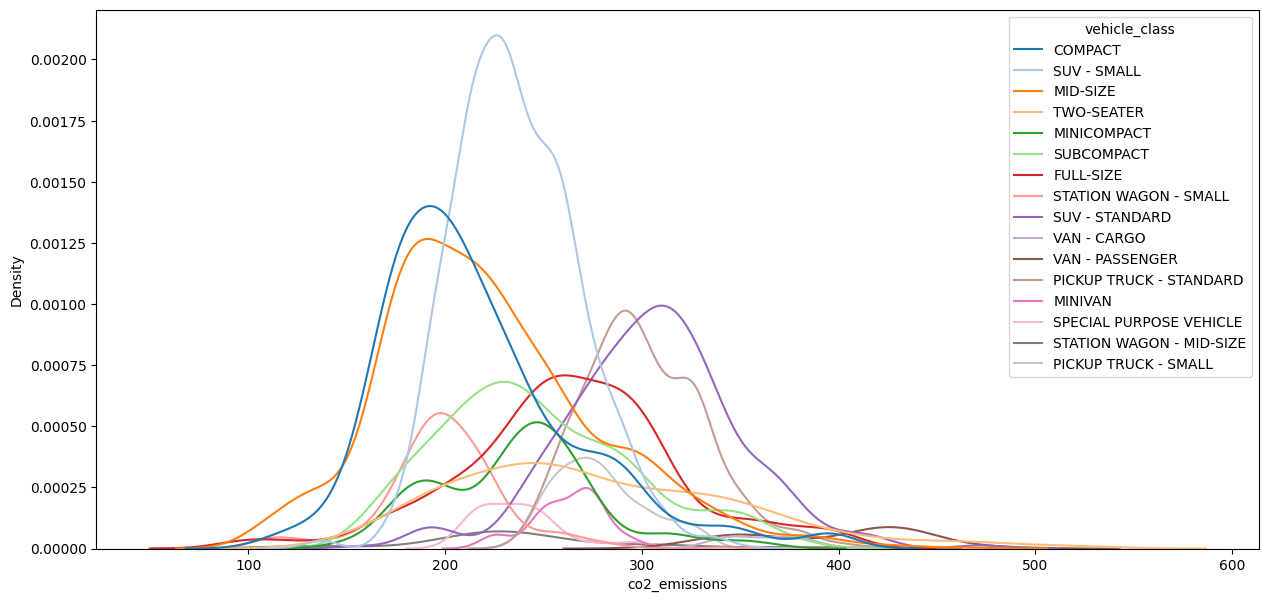

In [15]:
# Define a custom color palette with distinct colors
custom_palette = sns.color_palette("tab20", n_colors=len(transport_df['vehicle_class'].unique()))

# KDE plot each category in vehicle_class
plt.figure(figsize=(15, 7))
sns.kdeplot(data=transport_df, x=transport_df['co2_emissions'], hue=transport_df['vehicle_class'], fill=False, palette=custom_palette)
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

# Calculate Summary Statistics
# Mean, Median, Standard Deviation
summary_stats = transport_df.groupby('vehicle_class')['co2_emissions'].agg(['mean', 'median', 'std'])

# # Skewness, Kurtosis
# summary_stats['skewness'] = transport_df.groupby('vehicle_class')['co2_emissions'].apply(skew)
# summary_stats['kurtosis'] = transport_df.groupby('vehicle_class')['co2_emissions'].apply(kurtosis)

# Feature Scaling
scaler = StandardScaler()
summary_stats_scaled = scaler.fit_transform(summary_stats)
summary_stats

,mean,median,std
vehicle_class,,,
COMPACT,216.679061,206.5,50.443913
FULL-SIZE,263.316119,261.0,55.054891
MID-SIZE,222.463781,214.0,55.626307
MINICOMPACT,236.607362,242.0,40.971650
MINIVAN,262.312500,265.5,17.744740
PICKUP TRUCK - SMALL,278.968553,274.0,22.891439
PICKUP TRUCK - STANDARD,301.513011,298.0,30.477161
SPECIAL PURPOSE VEHICLE,237.597403,234.0,21.961845
STATION WAGON - MID-SIZE,238.698113,230.0,56.414532


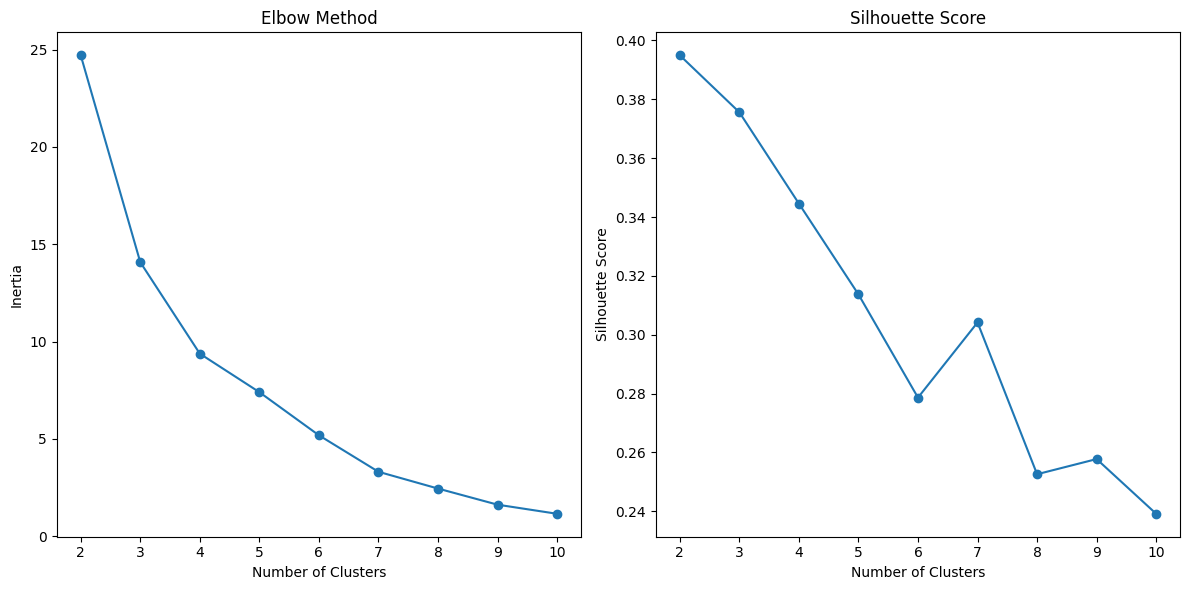

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding the correct n_clusters value using Elbow_method and using Silhouette_scores

# Empty lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Define range of clusters to try
range_n_clusters = range(2, 11)  # You can adjust this range as needed

for n_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    # Fit KMeans to the data
    kmeans.fit(summary_stats_scaled)
    
    # Compute the inertia
    inertia_values.append(kmeans.inertia_)
    
    # Compute the silhouette score
    if n_clusters > 1:  # Silhouette score requires at least 2 clusters
        silhouette_scores.append(silhouette_score(summary_stats_scaled, kmeans.labels_))
    else:
        silhouette_scores.append(np.nan)  # No silhouette score for 1 cluster

# Plot the elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [18]:
# Cluster Analysis using K-means Clustering
kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
clusters = kmeans.fit_predict(summary_stats_scaled)

# Grouping
# Adding cluster labels to the DataFrame
summary_stats['cluster'] = ['cluster' + str(cluster) for cluster in clusters]
summary_stats

,mean,median,std,cluster
vehicle_class,,,,
COMPACT,216.679061,206.5,50.443913,cluster0
FULL-SIZE,263.316119,261.0,55.054891,cluster0
MID-SIZE,222.463781,214.0,55.626307,cluster0
MINICOMPACT,236.607362,242.0,40.971650,cluster0
MINIVAN,262.312500,265.5,17.744740,cluster2
PICKUP TRUCK - SMALL,278.968553,274.0,22.891439,cluster2
PICKUP TRUCK - STANDARD,301.513011,298.0,30.477161,cluster6
SPECIAL PURPOSE VEHICLE,237.597403,234.0,21.961845,cluster3
STATION WAGON - MID-SIZE,238.698113,230.0,56.414532,cluster0


In [19]:
# Step 5: Validation (Optional)
# You can further analyze and validate the grouping by examining the characteristics of each cluster

# Output the grouped categories
grouped_categories = summary_stats.groupby('cluster').apply(lambda x: x.index.tolist()).tolist()
print("Grouped Categories:", grouped_categories)

Grouped Categories: [['COMPACT', 'FULL-SIZE', 'MID-SIZE', 'MINICOMPACT', 'STATION WAGON - MID-SIZE', 'SUBCOMPACT'], ['VAN - CARGO'], ['MINIVAN', 'PICKUP TRUCK - SMALL'], ['SPECIAL PURPOSE VEHICLE', 'STATION WAGON - SMALL', 'SUV - SMALL'], ['VAN - PASSENGER'], ['TWO-SEATER'], ['PICKUP TRUCK - STANDARD', 'SUV - STANDARD']]


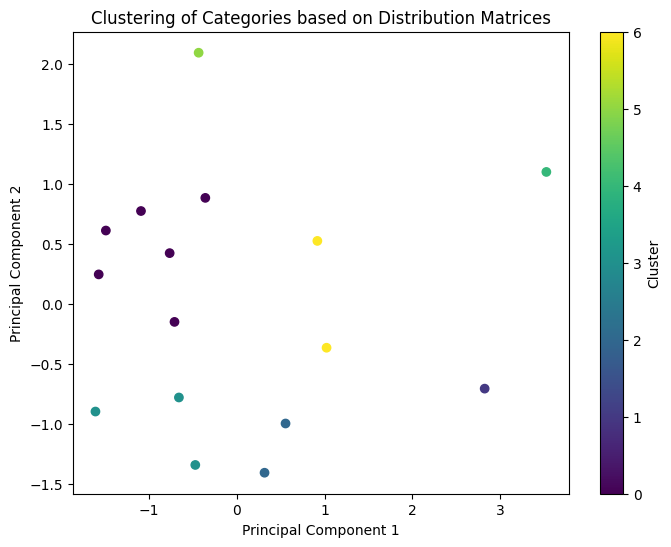

In [20]:
from sklearn.decomposition import PCA

# Step 5: Dimensionality Reduction using PCA
pca = PCA(n_components=2)
summary_stats_pca = pca.fit_transform(summary_stats_scaled)

# Step 6: Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(summary_stats_pca[:, 0], summary_stats_pca[:, 1], c=clusters)
# sns.scatterplot(x=summary_stats_pca[:, 0], y=summary_stats_pca[:, 1], hue=clusters, palette='Set1', legend='full')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of Categories based on Distribution Matrices')
plt.colorbar(label='Cluster')
plt.show()

In [21]:
# Applying the Grouping to the transport_df dataframe.

# # Map vehicle_class category to cluster label.
# category_cluster_mapping = dict(zip(summary_stats.index, clusters))

# Map vehicle_class category to cluster label with the string "cluster"
category_cluster_mapping = {key: "cluster" + str(value) for key, value in zip(summary_stats.index, clusters)}

# Apply cluster grouping to categorical variable
transport_df['vehicle_class'] = transport_df['vehicle_class'].map(category_cluster_mapping)

# Output the dataframe with cluster labels
transport_df

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_mpg,co2_emissions
0,others,ILX,cluster0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,others,ILX,cluster0,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,others,ILX,cluster0,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,others,MDX,cluster3,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,others,RDX,cluster3,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7379,VOLVO,XC40,cluster3,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7380,VOLVO,XC60,cluster3,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7381,VOLVO,XC60,cluster3,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7382,VOLVO,XC90,cluster6,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [22]:
# Viewing the counts associated with vehicle_class after grouping
transport_df['vehicle_class'].value_counts()

vehicle_class
cluster0    3778
cluster3    1546
cluster6    1273
cluster5     460
cluster2     239
cluster4      66
cluster1      22
Name: count, dtype: int64

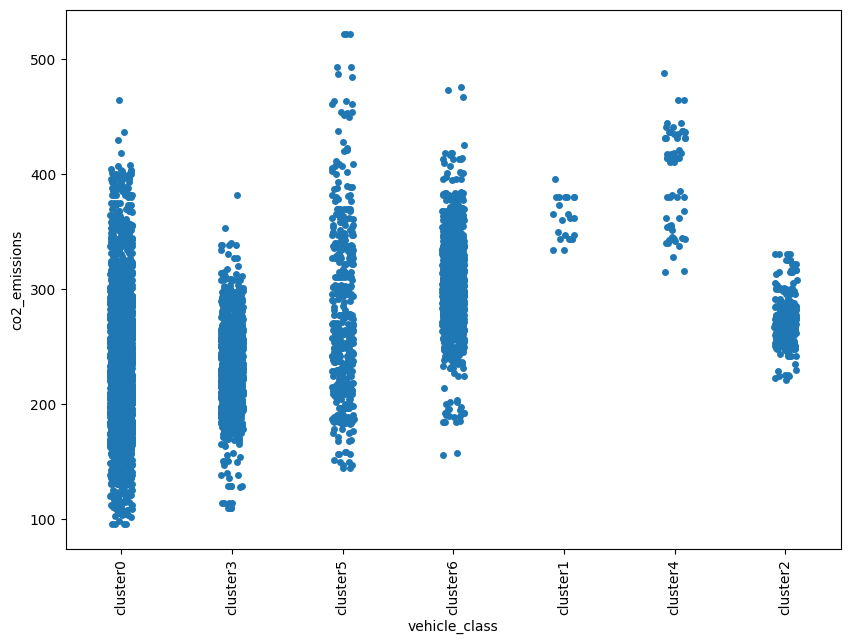

In [23]:
# Strip Plot of vehicle_class
plt.figure(figsize=(10, 7))
sns_plt = sns.stripplot(data=transport_df, x=transport_df['vehicle_class'], y=transport_df['co2_emissions'], jitter=True)
sns_plt.tick_params(axis='x', rotation=90)
plt.show()

In [24]:
# # Strip Plot of Transmission with Gear_numbers
# plt.figure(figsize=(15, 7))
# sns.stripplot(data=transport_df, x=transport_df['transmission'], y=transport_df['co2_emissions'], jitter=True)
# plt.title('Strip Plot')
# plt.show()

In [25]:
# import re

# # Remove Gear_numbers that associated with Transmission
# transport_df['transmission'] = [re.sub(r'\d+$', '', x) for x in transport_df['transmission']]

In [26]:
# # Viewing the counts associated with Transmission after removing Gear_numbers
# transport_df['transmission'].value_counts()

In [27]:
# # Strip Plot of Transmission with out Gear_numbers
# plt.figure(figsize=(10, 7))
# sns.stripplot(data=transport_df, x=transport_df['transmission'], y=transport_df['co2_emissions'], jitter=True)
# plt.title('Strip Plot')
# plt.show()

In [28]:
# Visualizing unique_categories_count & Observations/sample_count for each categories related to all Qualitative Variables
for i in transport_df_qualitative.columns:
    category_count = transport_df[i].value_counts()
    print(category_count)
    print("Unique categories count for", i ,":",transport_df[i].nunique())
    print()

make
FORD             628
CHEVROLET        587
BMW              527
MERCEDES-BENZ    419
others           406
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
Name: count, dtype: int64
Unique categories count for make : 31

model
I series       230
COOPER         204
F-150          191
M series       153
911 CARRERA    134
              ... 
CROSSTOUR        1
TELLURIDE        1
AVIATOR          1
ROUTAN           1
GR SUPRA         1
Name: count, Length: 351, dtype: int64
Unique categories count f

In [29]:
# Quantitative variable visualization and Analysis

In [30]:
# # Visualizing Using SCATTER PLOT
# for i in transport_df_quantitative.columns:
#     plt.figure(figsize=(10,7))
#     sns_plt = sns.scatterplot(data=transport_df, x=i, y='co2_emissions')
#     sns_plt.set(title=i + " Scatter Plot" +" with co2_emissions")
#     sns_plt.tick_params(axis='x', rotation=90)
#     plt.tight_layout()

In [31]:
# # Visualizing Using BAR PLOT (x -> categorical, y -> target(co2_emissions))
# for i in transport_df_qualitative.columns:
#     plt.figure(figsize=(15,7))
#     bar_plot = sns.barplot(data=transport_df, x=i, y='co2_emissions')
#     bar_plot.set(title=i + " Bar Plot")
#     bar_plot.tick_params(axis='x', rotation=90)
#     plt.tight_layout()

In [32]:
# # Calculating the correlation matrix
# corr_matrix = transport_df_quantitative.corr()

# # Ploting the HEATMAP
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
# plt.title("Correlation Matrix Heatmap")
# plt.show()

In [33]:
# We only can get the data regarding the Total Travel distance.
# We can't able to get 'fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb_mpg' these Data
# So we are dropping these columns from the Dataframe

dropping_columns_names = ['fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb_mpg', 'transmission']
transport_df.drop(columns = dropping_columns_names, inplace=True)

In [34]:
# Viewing the dataset after the Visualization and Preprocessing.
transport_df.head()

,make,model,vehicle_class,engine_size,cylinders,fuel_type,fuel_consumption_comb,co2_emissions
0,others,ILX,cluster0,2.0,4,Z,8.5,196
1,others,ILX,cluster0,2.4,4,Z,9.6,221
2,others,ILX,cluster0,1.5,4,Z,5.9,136
3,others,MDX,cluster3,3.5,6,Z,11.1,255
4,others,RDX,cluster3,3.5,6,Z,10.6,244


In [35]:
# # Visualizing unique_categories_count & Observations/sample_count for each categories related to all Qualitative Variables
# for i in transport_df_qualitative.columns:
#     category_count = transport_df[i].value_counts()
#     print(category_count)
#     print("Unique categories count for", i ,":",transport_df[i].nunique())
#     print()

In [36]:
# Writing the Preprocessed transport_df to a CSV file
transport_df.to_csv('Transportation_Preprocessed_Grouped_Dataset.csv', index=False)